In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Generar dataset
X, y = make_classification(n_samples=800, n_features=2, n_redundant=0, 
                          n_informative=2, n_clusters_per_class=1,
                          flip_y=0.1, class_sep=0.8, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1106)

## __Individual Model Training__

In [2]:
models = {
    "Logistic Regression": LogisticRegression(random_state=1106, C=0.5),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=1106),
    "SVM RBF": SVC(kernel="rbf", gamma=1.0, random_state=1106),
    "K-NN": KNeighborsClassifier(n_neighbors=5)
}

# Training
individual_scores = {}
for model in models.values():
    model.fit(X_train, y_train)

## __Ensemble Model Training__

In [3]:
ensemble = VotingClassifier(estimators=list(models.items()), voting="hard")
ensemble.fit(X_train, y_train)

,estimators,"[('Logistic Regression', ...), ('Decision Tree', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,0.5
,fit_intercept,True


## __Results and Accuracy__

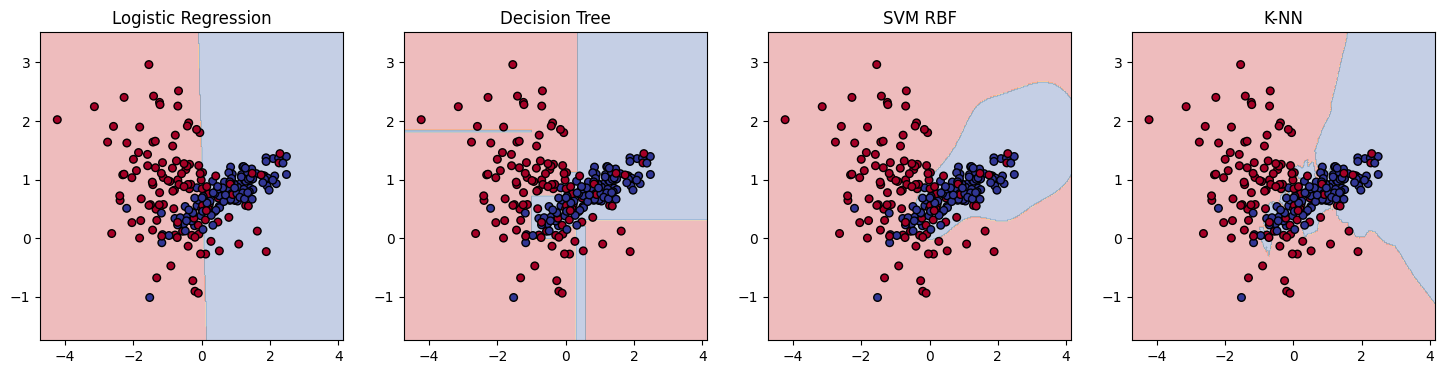

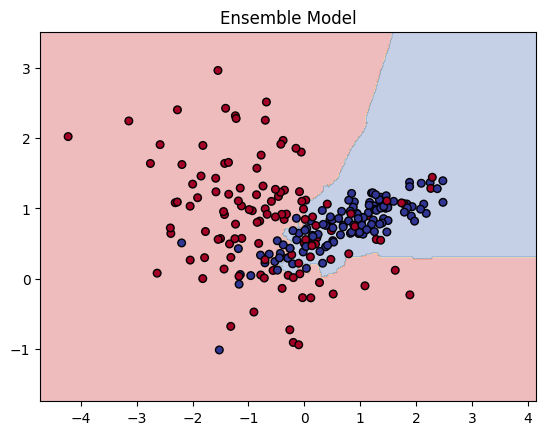

In [4]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))

# Mesh for decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Individual models
for idx, (name, model) in enumerate(models.items()):
    ax = axs[idx]
    # Predict mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Decision boundary
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
               cmap=plt.cm.RdYlBu, edgecolor="black", s=30)
    ax.set_title(name)
plt.savefig("./figures/ensemble_individual_models.png")
plt.show()

Z_ensemble = ensemble.predict(np.c_[xx.ravel(), yy.ravel()])
Z_ensemble = Z_ensemble.reshape(xx.shape)
plt.contourf(xx, yy, Z_ensemble, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, 
                   cmap=plt.cm.RdYlBu, edgecolor="black", s=30)
plt.title("Ensemble Model")
plt.savefig("./figures/ensemble_model.png")
plt.show()

In [5]:
print("Individual Model Accuracies")
print("-"*30)
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: {accuracy:.4f}")

score = accuracy_score(y_test, ensemble.predict(X_test))
print(f"\nEnsemble Model: {score:.4f}")

Individual Model Accuracies
------------------------------
Logistic Regression: 0.7750
Decision Tree: 0.8125
SVM RBF: 0.8167
K-NN: 0.8333

Ensemble Model: 0.8292
